In [56]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import string
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from pgmpy.models import NaiveBayes
from sklearn import decomposition
from sklearn.metrics import roc_auc_score

from nltk.corpus import stopwords
import nltk

In [57]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [59]:
categories = os.listdir('Data')

file_content_list = []

for category in categories:
    directory = f"./Data/{category}/"
    files = os.listdir(directory)
    for file_name in files:
        content = open(directory + file_name, encoding="utf8").read()
        row = [file_name, content, category]
        file_content_list.append(row)


file_content_df = pd.DataFrame(file_content_list, columns=['file_name', 'content', 'category'])
print(file_content_df.head())
corpus = []
for text in file_content_df['content'].to_numpy().tolist():
    text_without_punctuation = ''.join([ch for ch in text if ch not in string.punctuation])
    corpus.append(text_without_punctuation.lower())

pipe = Pipeline([('count', CountVectorizer(tokenizer = LemmaTokenizer())),
                ('tfid', TfidfTransformer())]).fit(corpus)
# pipe['count'].transform(corpus).toarray()
data = pipe.transform(corpus).toarray()
pca = decomposition.PCA(n_components=50)
pca.fit(data)
pca_data = pca.transform(data)

# df['category'] = fileContentDf['category']
# print(df.head())
# print(df.shape)


          file_name                                            content  \
0    business_1.txt  Lufthansa flies back to profit\n\nGerman airli...   
1   business_10.txt  Winn-Dixie files for bankruptcy\n\nUS supermar...   
2  business_100.txt  US economy still growing says Fed\n\nMost area...   
3   business_11.txt  Saab to build Cadillacs in Sweden\n\nGeneral M...   
4   business_12.txt  Bank voted 8-1 for no rate change\n\nThe decis...   

   category  
0  business  
1  business  
2  business  
3  business  
4  business  


In [61]:
y = file_content_df['category'].to_numpy()
train_x, test_x, train_y, test_y = train_test_split(pca_data, y, random_state=42)
train_df = pd.DataFrame(train_x)


train_df['category'] = train_y


test_df = pd.DataFrame(test_x)
test_df['category'] = test_y
# print(test_df.columns)

test_df = test_df.drop(['category'], axis=1)

print(train_df.shape)
print(test_df.shape)

print(train_df['category'].value_counts())
# print(test_df['category'].value_counts())

# print(train_df.head())
# print(test_df.head())

print(train_df.columns)
train_df.swapaxes("index", "columns")
print(test_df.columns)



(750, 51)
(250, 50)
space            84
entertainment    83
historical       82
sport            73
graphics         73
technologie      72
politics         72
business         71
medical          71
food             69
Name: category, dtype: int64
Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,         35,
               36,         37,         38,         39,         40,         41,
               42,         43,         44,         45,         46,         47,
               48,         49, 'category'],
      dtype='object')
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11

In [62]:
train_df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,category
0,0.039134,-0.001010,-0.046749,-0.000874,0.110833,-0.033228,-0.037178,-0.064185,0.109388,-0.031817,...,-0.053144,-0.021345,-0.005356,0.007433,0.001956,-0.017812,-0.016200,0.004248,0.045271,business
1,-0.030578,-0.051675,-0.007593,0.082318,0.065096,0.046109,-0.050774,0.026773,-0.014832,-0.011383,...,0.036092,-0.036304,0.066521,-0.046173,-0.016610,-0.014613,-0.011346,-0.011960,-0.006200,technologie
2,-0.032513,0.011243,0.069039,0.014192,0.036605,0.004281,-0.091114,0.050226,-0.118409,-0.127789,...,-0.027421,-0.031159,-0.026072,0.014448,-0.024050,-0.005966,0.038372,-0.024094,0.044532,space
3,-0.018645,-0.090369,-0.102473,-0.144495,-0.140361,0.002306,-0.007247,-0.070154,-0.032827,-0.018018,...,-0.036964,-0.014020,0.010403,-0.003316,0.045245,-0.052383,0.065134,-0.018361,-0.026202,sport
4,0.071042,-0.005264,0.031924,0.004499,-0.002584,0.011649,-0.045159,0.020999,-0.027932,-0.037057,...,0.110391,0.020090,-0.107839,-0.038059,-0.139246,-0.044445,-0.058608,0.048838,0.004905,graphics


In [63]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.073365,-0.134967,0.095050,0.026115,-0.087540,-0.027699,-0.048264,0.010553,-0.080896,0.047961,...,0.034902,-0.031361,-0.028543,0.042481,-0.030066,-0.041009,0.014337,-0.038239,-0.016997,-0.031258
1,0.181245,-0.038077,0.026277,0.001234,-0.002706,-0.063815,-0.021155,0.058898,-0.027259,-0.065071,...,0.073958,-0.017448,-0.049968,-0.041234,-0.077194,0.071175,0.084450,0.085320,0.042392,-0.032086
2,0.091255,-0.064455,0.036274,0.058973,0.008375,-0.011457,-0.003562,-0.005954,0.016656,0.026916,...,-0.010305,-0.014417,-0.034415,-0.000585,-0.016625,0.018426,0.011835,0.013950,0.028255,-0.025203
3,-0.067382,-0.047565,-0.119906,0.143065,-0.037897,-0.061504,0.143084,0.019220,0.031118,-0.027796,...,-0.058777,-0.044025,-0.081916,0.054465,-0.016626,0.025440,-0.027443,0.027981,-0.028038,0.041050
4,-0.140896,0.164015,0.069517,-0.089925,0.008405,-0.042130,0.009009,0.010467,0.014510,-0.086441,...,-0.012006,0.034078,-0.008917,0.021210,0.026860,-0.051165,-0.035525,0.026857,0.032776,0.003451


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

In [66]:
ypred=gnb.predict(test_x)
ypred

array(['medical', 'space', 'space', 'politics', 'historical', 'politics',
       'politics', 'medical', 'sport', 'entertainment', 'sport',
       'business', 'politics', 'technologie', 'business', 'food', 'food',
       'sport', 'space', 'graphics', 'medical', 'entertainment',
       'graphics', 'medical', 'food', 'food', 'entertainment',
       'technologie', 'technologie', 'graphics', 'graphics',
       'entertainment', 'politics', 'historical', 'graphics',
       'entertainment', 'politics', 'medical', 'technologie', 'sport',
       'graphics', 'business', 'graphics', 'technologie', 'food', 'food',
       'technologie', 'politics', 'historical', 'sport', 'medical',
       'sport', 'food', 'medical', 'politics', 'business', 'politics',
       'business', 'food', 'sport', 'food', 'business', 'medical', 'food',
       'politics', 'politics', 'politics', 'sport', 'graphics', 'space',
       'entertainment', 'historical', 'medical', 'space', 'food', 'food',
       'politics', 'business',

In [65]:
ypredprob=gnb.predict_proba(test_x)
ypredprob

array([[1.66791228e-24, 1.06190581e-15, 8.48842839e-09, ...,
        1.45877823e-07, 1.27007245e-21, 2.16465676e-09],
       [6.97035858e-19, 3.79812699e-16, 3.28485490e-11, ...,
        9.99934290e-01, 3.82185971e-15, 8.22568964e-09],
       [3.03619645e-07, 2.19375285e-08, 2.29894383e-04, ...,
        6.88157650e-01, 2.25278242e-09, 1.20836253e-01],
       ...,
       [1.00000000e+00, 6.35404704e-15, 5.92494807e-31, ...,
        2.65260208e-27, 6.03984031e-21, 4.30879127e-14],
       [9.99999991e-01, 9.38926238e-12, 2.15846929e-16, ...,
        5.42623587e-16, 4.01288616e-20, 8.86579585e-09],
       [4.56182834e-49, 2.46726565e-35, 1.00000000e+00, ...,
        2.99785996e-15, 5.41391322e-43, 1.55041360e-29]])

In [67]:
test_y

array(['medical', 'space', 'space', 'politics', 'historical', 'politics',
       'politics', 'medical', 'sport', 'entertainment', 'sport',
       'business', 'politics', 'technologie', 'technologie', 'sport',
       'food', 'sport', 'space', 'graphics', 'medical', 'entertainment',
       'graphics', 'medical', 'food', 'food', 'entertainment',
       'technologie', 'technologie', 'technologie', 'graphics',
       'entertainment', 'politics', 'historical', 'graphics',
       'entertainment', 'politics', 'medical', 'technologie', 'business',
       'graphics', 'business', 'graphics', 'technologie', 'food', 'food',
       'technologie', 'politics', 'historical', 'sport', 'medical',
       'sport', 'food', 'medical', 'business', 'business', 'politics',
       'business', 'food', 'sport', 'food', 'business', 'medical', 'food',
       'politics', 'politics', 'politics', 'sport', 'business', 'medical',
       'entertainment', 'historical', 'medical', 'space', 'food', 'food',
       'politics',

In [68]:
crect=0
for pred,act in zip(ypred,test_y):
    if pred == act:
        crect+=1
print(crect/250)

0.924


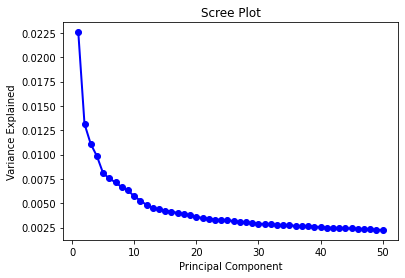

In [69]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
model = NaiveBayes(dependent_var='category')
model.fit(train_df)
res = model.predict(test_df)
print(res)